In [2]:
import numpy as np
from sklearn.datasets import load_wine
import  matplotlib.pyplot as plt

In [3]:
vinhos = load_wine()
x = vinhos.data
y = vinhos.target
classes = np.unique(y)

In [5]:
mediavetores = [np.mean(x[y == cl], axis=0) for cl in classes]

In [10]:
S_w = np.zeros((x.shape[1], x.shape[1]))
for cl, media_vec in zip(classes,mediavetores):
    class_sc_mat = np.zeros((x.shape[1], x.shape[1]))
    for row in x[y == cl]:
        row, media_vec = row.reshape(x.shape[1], 1), media_vec.reshape(x.shape[1], 1)
        class_sc_mat += (row - media_vec).dot((row - media_vec).T)
    S_w += class_sc_mat

overall_media = np.mean(x, axis=0)
S_t = np.zeros((x.shape[1], x.shape[1]))
for row in x:
    row, overall_media = row.reshape(x.shape[1], 1), overall_media.reshape(x.shape[1], 1)
    S_t += (row - overall_media).dot((row - overall_media).T)

S_b = S_t - S_w

In [11]:
auto_valores, auto_vetores = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))

In [12]:
sorted_indices = np.argsort(auto_valores)[::-1]
auto_valores = auto_valores[sorted_indices]
auto_veotres = auto_vetores[:, sorted_indices]
n_components = 2
projection_matrix = auto_vetores[:, :n_components]

In [15]:
x_lda = x.dot(projection_matrix)

D:\cayanzin\Anaconda\Anaconda\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\cayanzin\Anaconda\Anaconda\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


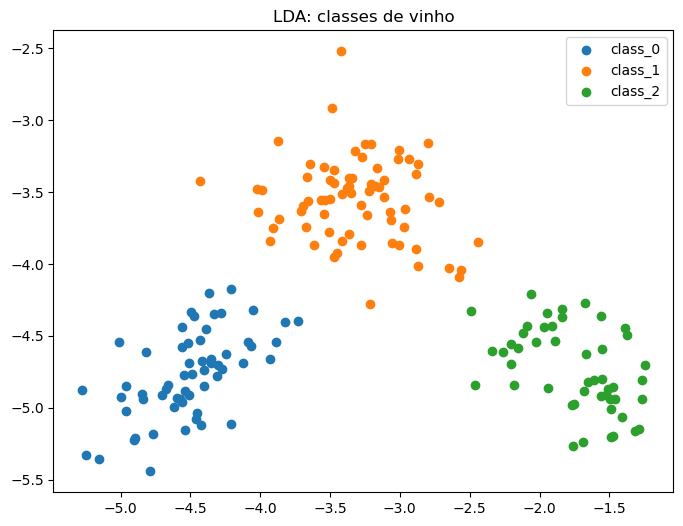

In [19]:
plt.figure(figsize=(8,6))
for cl in classes:
    plt.scatter(x_lda[y == cl, 0], x_lda[y == cl, 1], label=vinhos.target_names[cl])
plt.title('LDA: classes de vinho')
plt.legend()
plt.show()